# Validation (검증)

In [94]:
# MNIST
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [95]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

* training하는 동안 정확도를 추측하기 위해 훈련데이터 중 일부를 검증 데이터로 만들어두자.

In [96]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [97]:
val= net.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val),verbose=0)

In [98]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

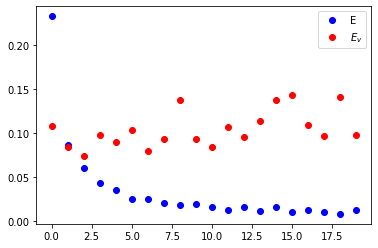

In [99]:
x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

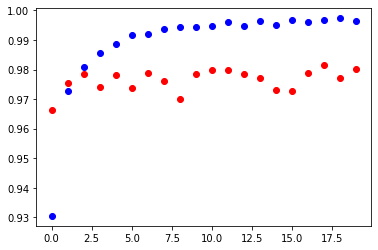

In [100]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

## Dropout 
과적합(over-fitting)을 피하기 위해서는 
0. 데이터의 수를 늘리거나
1. 네트워크의 크기를 줄여서 학습해야하는 파라미터를 줄이거나,
2. regularization을 통해 실질적인 역할을 하는 파라미터의 수를 규제하거나 (ridge/lasso 회귀처럼)
3. 학습하는 동안 몇 개의 노드를 꺼둔다(dropout).

In [101]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])


In [102]:
val2= model.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val),verbose=0)

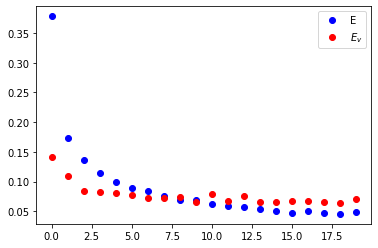

In [104]:
val_dict = val2.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

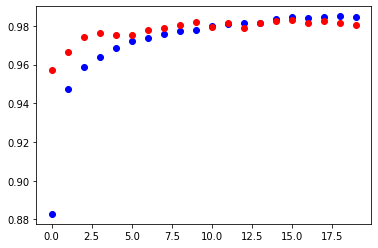

In [105]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

## Summary

다음은 일반적인 딥러닝 작업 단계입니다. 이를 고려하면서 문제를 해결하세요.
1. 문제와 데이터에 대한 이해
2. 명확한 목표 설정 (ex: 정확도)
3. 검증방법 설정 
4. 모델 설정 (layer 수, 활성화 함수, optimizer, batch size 등)
5. dropout, layer 줄이기, 모델 사이즈 줄이기 등으로 모델을 규제하고 과소적합도 과대적합도 아닌 적정한 모델 찾기

다음은 문제 유형에 따른 적절한 loss 함수와 출력층의 활성화 함수입니다. 참조하세요.

| 문제 유형 | loss function | activation function |
| --- | --- | --- |
| binary classification | binary_crossentropy | sigmoid |
| multi-class classification | categorical_crossentropy | softmax |
| regression | - | MSE (mean squared error) |